In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install tabulate


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ahern\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
#loading dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)


In [5]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [25]:
#splitting teh data into train, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Model 1: Logistic Regression
logistic_model = Pipeline([
    ("scaler", StandardScaler()), 
    ("classifier", LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial'))
])

# Model 2: Random 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
# Training the models

logistic_model.fit(X_train, y_train)


rf_model.fit(X_train, y_train)

C:\Users\ahern\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RandomForestClassifier(random_state=42)

Validation Accuracy - Logistic Regression: 0.9151
Validation Accuracy - Random Forrest: 0.9668


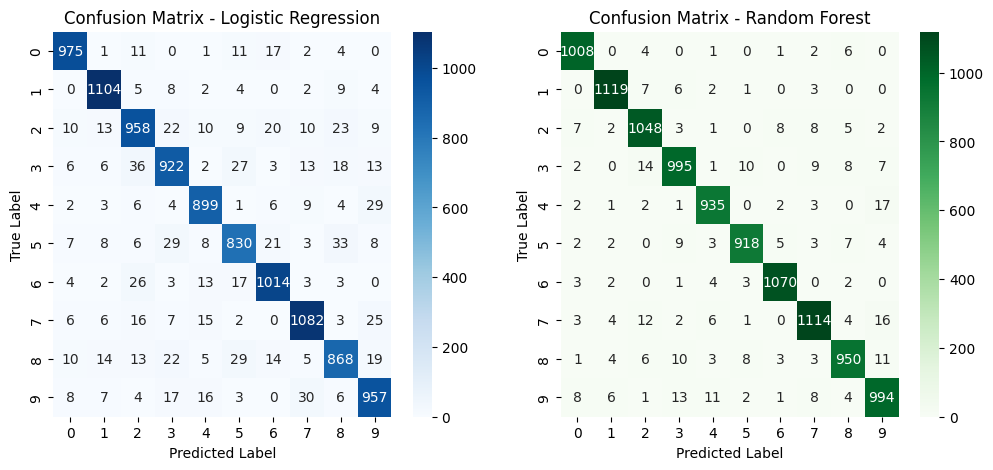

In [ ]:
# Using models on validation
y_val_pred_logistic = logistic_model.predict(X_val)
y_val_pred_rf = rf_model.predict(X_val)

# Looking at the accuracy of both models
val_acc_logistic = accuracy_score(y_val, y_val_pred_logistic)
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Validation Accuracy - Logistic Regression: {val_acc_logistic:.4f}")
print(f"Validation Accuracy - Random Forrest: {val_acc_rf:.4f}")

cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
cm_rf = confusion_matrix(y_val, y_val_pred_rf)

# Plotting both maurixes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")
plt.show()

In [ ]:
# Using the Random Forest model on the Test data
y_test_pred = rf_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Final Test Accuracy: {test_acc:.4f}")



Final Test Accuracy: 0.9668


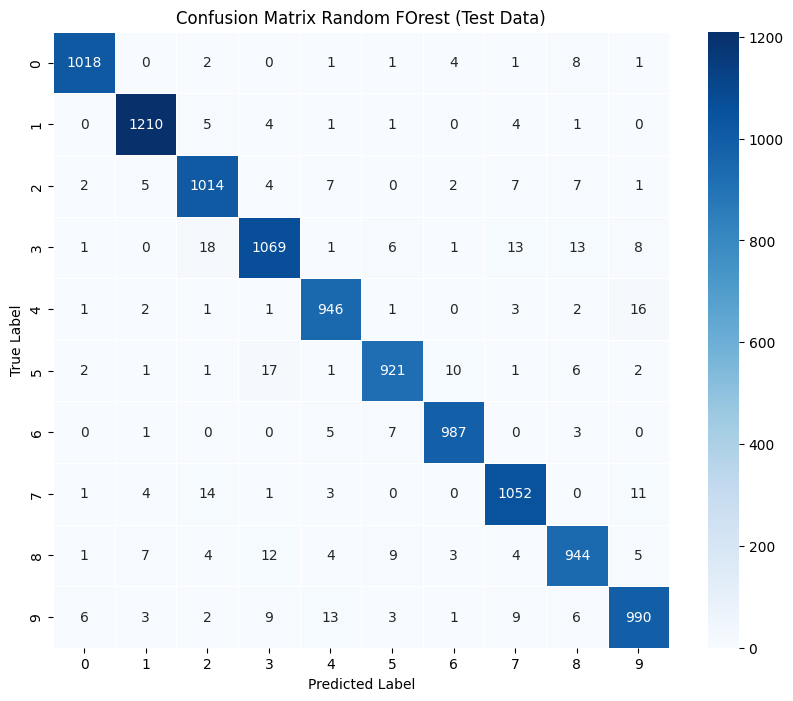

In [ ]:
#  Confusion Matrix for the Random forest test
cm_best = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=True, fmt="d", cmap='Blues', linewidths=0.5, square=True)
plt.title(f"Confusion Matrix Random FOrest (Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:

from tabulate import tabulate
import pandas as pd

#classification report
report_dict = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(2)
table = tabulate(report_df, headers="keys", tablefmt="grid")
print(table)

+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |        0.99 |     0.98 |       0.98 |   1036    |
+--------------+-------------+----------+------------+-----------+
| 1            |        0.98 |     0.99 |       0.98 |   1226    |
+--------------+-------------+----------+------------+-----------+
| 2            |        0.96 |     0.97 |       0.96 |   1049    |
+--------------+-------------+----------+------------+-----------+
| 3            |        0.96 |     0.95 |       0.95 |   1130    |
+--------------+-------------+----------+------------+-----------+
| 4            |        0.96 |     0.97 |       0.97 |    973    |
+--------------+-------------+----------+------------+-----------+
| 5            |        0.97 |     0.96 |       0.96 |    962    |
+--------------+-------------+----------+------------+--------

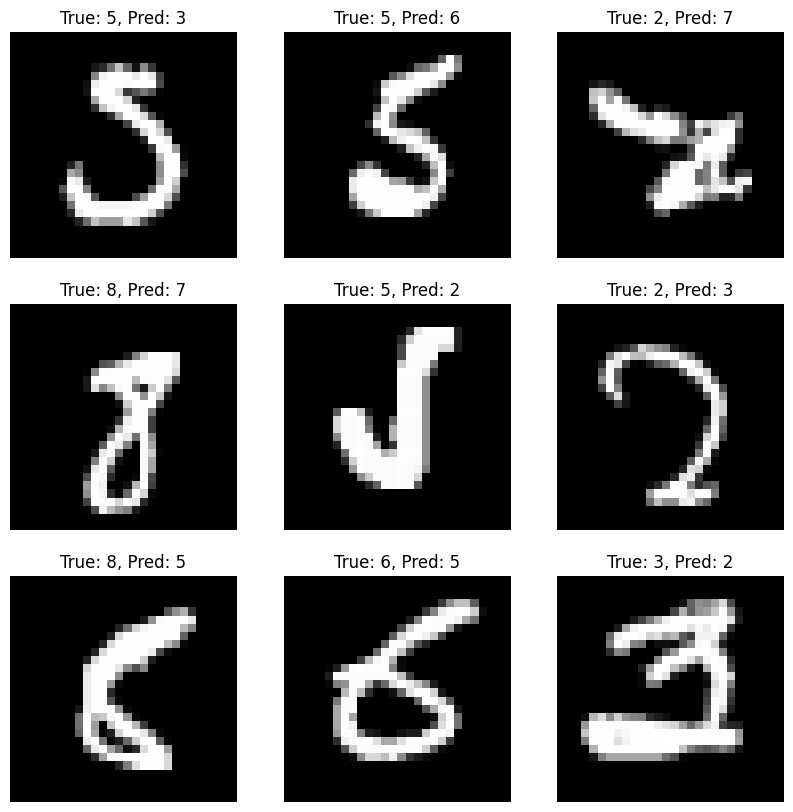

In [38]:

import random

wrong_indexes = np.where(y_test != y_test_pred)[0]

# Randomly pick 9 incorrectly predicted samples
random_samples = random.sample(list(wrong_indexes), 9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_test_pred[idx]}")
    plt.axis('off')
plt.show()